In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rich.console import Console
from rich.progress import track

In [20]:
console = Console()

In [21]:
class SimpleNeuralNetworkModel:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.rand(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.a1 = None
        self.z1 = None
        self.z2 = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def ReLu(self, x):
        return np.maximum(0, x)
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward_propagation(self, x):
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        y_hat = self.sigmoid(self.z2)
        #print('forward_propagation',y_hat.shape,'\n',x.shape)
        return y_hat
    
    def backward_propagation(self, x, y, y_hat):
        #print('backward_propagation',y.shape,'\n',y_hat.shape)
        error = y_hat - y
        dW2 = np.dot(self.a1.T, error * self.sigmoid_derivative(self.z2))
        db2 = np.sum(error * self.sigmoid_derivative(self.z2), axis=0, keepdims=True)
        dW1 = np.dot(x.T, np.dot(error * self.sigmoid_derivative(self.z2), self.W2.T) * self.sigmoid_derivative(self.z1))
        db1 = np.sum(np.dot(error * self.sigmoid_derivative(self.z2), self.W2.T) * self.sigmoid_derivative(self.z1), axis=0)

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, x, y, epochs=10000):
        # Barra de progreso para las épocas
        with console.status("[bold green]Entrenando la red neuronal..."):
            for epoch in track(range(epochs), description="Procesando épocas..."):
                y_hat = self.forward_propagation(x)
                self.backward_propagation(x=x, y=y, y_hat=y_hat)
                if epoch % 1000 == 0:
                    loss = np.mean(np.square(y_hat - y))
                    console.log(f"[bold cyan]Epoch {epoch}[/bold cyan] - [bold red]Pérdida: {loss}[/bold red]")
        console.log("[bold green]Entrenamiento completado.[/bold green]")
    
    def predict(self, x):
        y_hat = self.forward_propagation(x)
        return np.round(y_hat).astype(int)
    
    def accuracy(self, y_pred, y_true):
        return np.mean(y_pred == y_true.reshape(-1, 1)) * 100
        

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

# Filtrar solo las clases Setosa (0) y Versicolor (1)
iris_df = iris_df[iris_df["target"] != 2]
X = iris_df[['petal length (cm)', 'petal width (cm)']].values
Y = iris_df['target'].values
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train[:5])
print(Y_train[:5])
# Escalar los datos (normalización)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5])
print(X_train.shape) # <--- Se nesesita saber la acntidad de datos de entrada en este caso son 2 neuronas poruqe los datos que entran son
# Petal Length y Petal Width por eso se tiene 2 neuronas y se extrae esa data por la funcion shape espesificando que queremos en numero de
# Columnas con la sintaxis [1]

[[4.5 1.3]
 [4.1 1.3]
 [1.6 0.4]
 [1.3 0.2]
 [3.9 1.1]]
[1 1 0 0 1]
[[ 1.13555602  0.89744481]
 [ 0.8521099   0.89744481]
 [-0.91942835 -0.73427302]
 [-1.13201294 -1.09687699]
 [ 0.71038684  0.53484084]]
(80, 2)


In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

data = X_train

W1 = np.random.randn(X_train.shape[1], 4)
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1)
b2 = np.zeros((1, 1))
z1 = np.dot(data, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
hat_y = sigmoid(z2)
error = hat_y - Y_train.reshape(-1, 1)

print(hat_y.shape,'\n',data.shape)
print(Y_train.reshape(-1, 1).shape,'\n')
print(error.shape)

(80, 1) 
 (80, 2)
(80, 1) 

(80, 1)


In [33]:
nn = SimpleNeuralNetworkModel(
    input_size=X_train.shape[1],
    hidden_size=5,
    output_size=1
    )
nn.train(
    x=X_train,
    y=Y_train.reshape(-1, 1)
    )

Output()

In [27]:
y_pred = nn.predict(X_train)
nn.accuracy(y_pred, Y_train)

np.float64(100.0)

In [28]:
# Crear una malla para dibujar la frontera de decisión
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [29]:
# Propagación hacia adelante en la malla de puntos
Z = nn.forward_propagation(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/tmp/ipykernel_17400/2516828002.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x')


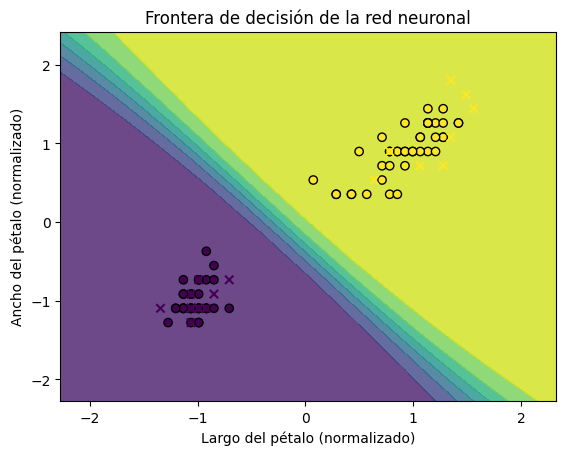

In [31]:
# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x')
plt.xlabel('Largo del pétalo (normalizado)')
plt.ylabel('Ancho del pétalo (normalizado)')
plt.title('Frontera de decisión de la red neuronal')
plt.show()